# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


In [6]:
df_test = pd.read_csv('otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,59909969,0,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,...,1,2,2,8,0,0,0,0,NaN,test
1,59910420,0,48,0,1,1,0,0,Среднее,Состою в браке,...,0,2,1,15,0,0,0,0,NaN,test
2,59911223,0,35,1,0,0,1,0,Среднее,Не состоял в браке,...,1,1,1,1,0,0,0,0,NaN,test
3,59911322,0,22,1,0,0,0,0,Среднее,Не состоял в браке,...,1,3,2,9,0,0,0,0,NaN,test
4,59911438,0,27,1,0,1,2,2,Высшее,Состою в браке,...,1,1,1,5,0,0,0,0,NaN,test


### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [ ]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [13]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [14]:
#Комментарии в задании 3

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [ ]:
#Комментарии в задании 3

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [12]:
def preproc_data(df_input):
    df_output = df_input.copy()
    df_output = df_output.drop(('AGREEMENT_RK'), axis=1)
    
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    
    #РЕДАКТИРОВАНИЕ ПРОПУСКОВ
    
    #Переменные катгориальные и пропусков не так много, чтобы удалять признаки, и не так мало, чтобы удалять строки.
    #Поэтому заменим пропущенные значения на новую катгорию other
    df_output['GEN_INDUSTRY'] = df_output['GEN_INDUSTRY'].fillna('Другие сферы', axis=0)
    df_output['GEN_TITLE'] = df_output['GEN_TITLE'].fillna('Другое', axis=0)
    df_output['ORG_TP_STATE'] = df_output['ORG_TP_STATE'].fillna('Другое', axis=0)
    df_output['GEN_INDUSTRY'] = df_output['GEN_INDUSTRY'].fillna('Другое', axis=0)
    df_output['JOB_DIR'] = df_output['JOB_DIR'].fillna('Другое', axis=0)
    
    #Заменим пустые значение на самые популярные, и затем преобразим в бинарный признак 
    data_describe = df['ORG_TP_FCAPITAL'].describe()
    df['ORG_TP_FCAPITAL'] = df['ORG_TP_FCAPITAL'].fillna(data_describe['top'])   
        
    #Числовой признак, имеет смысл пропущенные значения заменить на среднее.
    df_output[['WORK_TIME']] = df_output[['WORK_TIME']].fillna(df_output[['WORK_TIME']].mean())
    
    
    #В данном признаке почти нет информации, слишком ного наблюдейний пропущенно, поэтому имеет смысл этот признак просто удалить.
    df_output= df_output.drop(('PREVIOUS_CARD_NUM_UTILIZED'), axis=1)

    #Оставшихся пропусков не так много, и если удалить данные наблюдений на качество модели это сильно не повлияет
    df_output = df_output.dropna()
  

    #ПРЕОБРАЗОВАНИЕ КАТГОРИАЛЬНЫХ ПРИЗНАКОВ В ЧИСЛОВЫЕ
    
   #Категорриальный признак "Образование" можно представить в виде числового
    df_output['EDUCATION'].replace(['Неполное среднее','Среднее','Среднее специальное','Неоконченное высшее','Высшее','Два и более высших образования','Ученая степень'], [0,1,2,3,4,5,6], inplace=True)
           
   #Данный категориальный признак можно сделать бинарным   
    df_output['MARITAL_STATUS'].replace(['Не состоял в браке' ,'Разведен(а)','Вдовец/Вдова','Состою в браке' , 'Гражданский брак'], [0,0,0,1,1], inplace=True)
 
    #Преобразуем данную переменную в числовую
    df['FAMILY_INCOME'].replace(['от 10000 до 20000 руб.', 'от 20000 до 50000 руб.', 'от 5000 до 10000 руб.', 'свыше 50000 руб.', 'до 5000 руб.'], [0,1,2,3,4], inplace=True)
     
    #Остальных категориальные признаки некорректно переводить просто в числовые переменные (регион, вид деятельности), 
    #поэтому, если все признаки являются важными, то преобразуем их в дамми-переменные

    train = df_output

    categorical_columns = [c for c in train.columns if train[c].dtype.name == 'object']
    numerical_columns   = [c for c in train.columns if train[c].dtype.name != 'object']


    for i in categorical_columns:
        print (train[i].unique())

    data_describe = train.describe(include=[object])
    for c in categorical_columns:
        train[c] = train[c].fillna(data_describe[c]['top'])
    
    train.describe(include=[object])    

    binary_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
    nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]

    for c in binary_columns:
        top = data_describe[c]['top']
        top_items = train[c] == top
        train.loc[top_items, c] = 0
        train.loc[np.logical_not(top_items), c] = 1
    
    train[binary_columns].describe()

    data_nonbinary = pd.get_dummies(train[nonbinary_columns])


    data_numerical = train[numerical_columns]

    data = pd.concat((data_numerical, train[binary_columns], data_nonbinary), axis=1)
    data = pd.DataFrame(data, dtype=float)

    return data

In [13]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

['Образование' 'Металлургия/Промышленность/Машиностроение' 'Другие сферы'
 'Сборочные производства' 'Торговля' 'Строительство'
 'Ресторанный бизнес/Общественное питание' 'Нефтегазовая промышленность'
 'Транспорт' 'Здравоохранение' 'Государственная служба' 'Наука'
 'Развлечения/Искусство' 'ЧОП/Детективная д-ть'
 'Коммунальное хоз-во/Дорожные службы' 'Сельское хозяйство' 'Энергетика'
 'Информационные технологии' 'Управляющая компания' 'Банк/Финансы'
 'Юридические услуги/нотариальные услуги' 'Салоны красоты и здоровья'
 'Информационные услуги' 'Химия/Парфюмерия/Фармацевтика' 'Страхование'
 'СМИ/Реклама/PR-агенства' 'Недвижимость' 'Логистика' 'Туризм'
 'Подбор персонала' 'Маркетинг']
['Специалист' 'Рабочий' 'Руководитель среднего звена'
 'Индивидуальный предприниматель' 'Служащий' 'Другое'
 'Руководитель высшего звена' 'Руководитель низшего звена'
 'Высококвалифиц. специалист' 'Работник сферы услуг'
 'Военнослужащий по контракту' 'Партнер']
['Государственная комп./учреж.' 'Частная компания

In [14]:
x1 = df_preproc.drop(('TARGET'), axis=1)
y1 = df_preproc['TARGET']

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [15]:
X = df_train_preproc.drop(('TARGET'), axis=1)
X_test= df_test_preproc.drop(('TARGET'), axis=1)

y = df_train_preproc['TARGET']
y_test = df_test_preproc['TARGET'] 

#### Задание 5. Обучение и оценка качества разных моделей

In [16]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=42)

/srv/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here

algorithms = []
algorithms.append(DecisionTreeClassifier())
algorithms.append(RandomForestClassifier())
algorithms.append(LogisticRegression())

name_algo = ['DecisionTreeClassifier', 'RandomForestClassifier', 'LogisticRegression'] 
for algo,i in zip(algorithms, name_algo):
    algo.fit(X_train, y_train)
    print("Алгоритм: {}. Предсказание меток на тесте: {}".format(i, algo.predict(X_test)))
    print("Алгоритм: {}. Предсказание вероятности меток на тесте: {}".format(i, algo.predict_proba(X_test)))

Алгоритм: DecisionTreeClassifier. Предсказание меток на тесте: [ 0.  0.  0. ...,  0.  0.  0.]
Алгоритм: DecisionTreeClassifier. Предсказание вероятности меток на тесте: [[ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 ..., 
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]]
Алгоритм: RandomForestClassifier. Предсказание меток на тесте: [ 0.  0.  0. ...,  0.  0.  0.]
Алгоритм: RandomForestClassifier. Предсказание вероятности меток на тесте: [[ 1.   0. ]
 [ 0.9  0.1]
 [ 0.9  0.1]
 ..., 
 [ 1.   0. ]
 [ 1.   0. ]
 [ 0.9  0.1]]
Алгоритм: LogisticRegression. Предсказание меток на тесте: [ 0.  0.  0. ...,  0.  0.  0.]
Алгоритм: LogisticRegression. Предсказание вероятности меток на тесте: [[ 0.76803659  0.23196341]
 [ 0.90204077  0.09795923]
 [ 0.9556511   0.0443489 ]
 ..., 
 [ 0.89889151  0.10110849]
 [ 0.87478899  0.12521101]
 [ 0.86588469  0.13411531]]


In [20]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
    

mtrc = ['accuracy_score', 'precision_score', 'recall_score']
metric = []
metric.append(accuracy_score)
metric.append(precision_score)
metric.append(recall_score)


for algo, i in zip(algorithms, name_algo):
    algo.fit(X_train, y_train)
    for m,j in zip(metric, mtrc):
        
        print("Алгоритм: {}. Метрика: {}. Правильность: {:.3f}".format(i, j, m(y_test, algo.predict(X_test))))  

Алгоритм: DecisionTreeClassifier. Метрика: accuracy_score. Правильность: 0.784
Алгоритм: DecisionTreeClassifier. Метрика: precision_score. Правильность: 0.139
Алгоритм: DecisionTreeClassifier. Метрика: recall_score. Правильность: 0.150
Алгоритм: RandomForestClassifier. Метрика: accuracy_score. Правильность: 0.877
Алгоритм: RandomForestClassifier. Метрика: precision_score. Правильность: 0.286
Алгоритм: RandomForestClassifier. Метрика: recall_score. Правильность: 0.008
Алгоритм: LogisticRegression. Метрика: accuracy_score. Правильность: 0.878
Алгоритм: LogisticRegression. Метрика: precision_score. Правильность: 0.000
Алгоритм: LogisticRegression. Метрика: recall_score. Правильность: 0.000


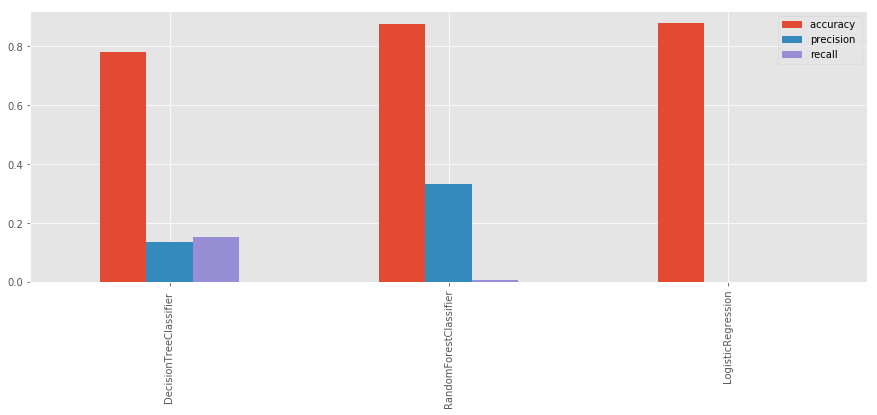

In [21]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

#Способ 1
from sklearn.metrics import accuracy_score, precision_score, recall_score
mtrc = ['accuracy_score', 'precision_score', 'recall_score']
metric = []
metric.append(accuracy_score)
metric.append(precision_score)
metric.append(recall_score)


t=[[0,0,0],[0,0,0],[0,0,0]]
r = range(0,3)
v = range(0,3)
          
for algo, i,k in zip(algorithms, name_algo, r):       
    algo.fit(X_train, y_train)    
    
    for m,j,l in zip(metric, mtrc,v):
        
        f = m(y_test, algo.predict(X_test))
        t[l][k] = f

t = pd.DataFrame(t)
t = t.rename(columns={0: 'DecisionTreeClassifier ',1: 'RandomForestClassifier', 2: 'LogisticRegression'})
m = t.transpose()
m = m.rename(columns={0: 'accuracy ',1: 'precision', 2: 'recall'})
m.plot(kind='bar',  figsize=(15, 5) )           

Алгоритм: DecisionTreeClassifier. Метрика: accuracy_score. Правильность: 0.788
Алгоритм: DecisionTreeClassifier. Метрика: precision_score. Правильность: 0.153
Алгоритм: DecisionTreeClassifier. Метрика: recall_score. Правильность: 0.164


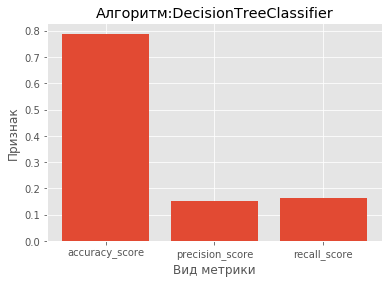

Алгоритм: RandomForestClassifier. Метрика: accuracy_score. Правильность: 0.876
Алгоритм: RandomForestClassifier. Метрика: precision_score. Правильность: 0.143
Алгоритм: RandomForestClassifier. Метрика: recall_score. Правильность: 0.004


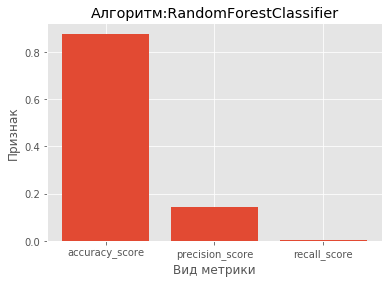

Алгоритм: LogisticRegression. Метрика: accuracy_score. Правильность: 0.878
Алгоритм: LogisticRegression. Метрика: precision_score. Правильность: 0.000
Алгоритм: LogisticRegression. Метрика: recall_score. Правильность: 0.000


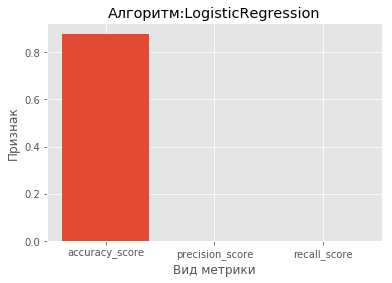

In [23]:
#Способ 2

from sklearn.metrics import accuracy_score, precision_score, recall_score
mtrc = ['accuracy_score', 'precision_score', 'recall_score']
metric = []
metric.append(accuracy_score)
metric.append(precision_score)
metric.append(recall_score)


for algo, i in zip(algorithms, name_algo):
    algo.fit(X_train, y_train)
    t = []
    for m,j in zip(metric, mtrc):        
        print("Алгоритм: {}. Метрика: {}. Правильность: {:.3f}".format(i, j, m(y_test, algo.predict(X_test))))  
        t.append(m(y_test, algo.predict(X_test)))
    plt.bar(range(len(t)), t, tick_label =mtrc )
    plt.title('Алгоритм:%s'%i)
    plt.xlabel("Вид метрики")
    plt.ylabel("Признак")
    plt.show()    

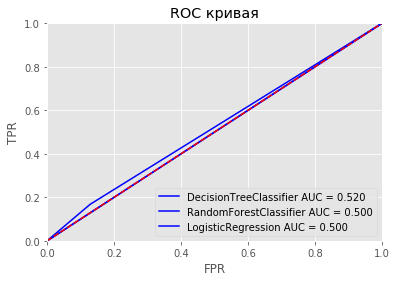

In [29]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе

from sklearn import metrics

# method I: plt
import matplotlib.pyplot as plt
plt.title('ROC кривая')


for algo,i in zip(algorithms, name_algo):
    algo.fit(X_train, y_train)
    fpr, tpr, threshold = metrics.roc_curve(y_test, algo.predict(X_test))
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = '{} AUC = {:.3f}'.format(i,roc_auc))
    
    
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.show()


## Your Code Here

In [26]:
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
from sklearn.cross_validation import cross_val_score, StratifiedKFold

x1 = df_preproc.drop(('TARGET'), axis=1)
y1 = df_preproc['TARGET']    

X, y =x1,y1
for algo,i in zip(algorithms, name_algo):
    cv = StratifiedKFold(y, n_folds=10, shuffle=True)
    scores = cross_val_score(algo, X, y, cv=cv, scoring='roc_auc')
    print("Алгоритм: {}. ROC_AUC = {:.3f}".format(i, scores.mean()))
 

Алгоритм: DecisionTreeClassifier. ROC_AUC = 0.516
Алгоритм: RandomForestClassifier. ROC_AUC = 0.580
Алгоритм: LogisticRegression. ROC_AUC = 0.605


In [32]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки
lg = DecisionTreeClassifier().fit(X_train, y_train)

print("Алгоритм: DecisionTreeClassifier. Предсказание вероятности меток на тесте: {}".format(lg.predict_proba(X_test)))

## Your Code Here

Алгоритм: DecisionTreeClassifier. Предсказание вероятности меток на тесте: [[ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 ..., 
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]]


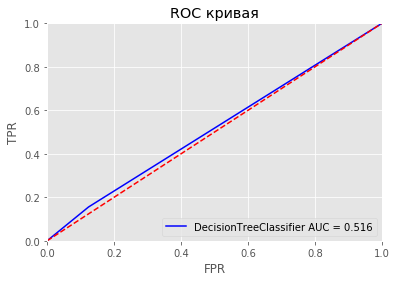

In [34]:
# Померить roc_auc на тесте
import matplotlib.pyplot as plt
plt.title('ROC кривая')



dtc = DecisionTreeClassifier().fit(X_train, y_train)
fpr, tpr, threshold = metrics.roc_curve(y_test, dtc.predict(X_test))
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = '{} AUC = {:.3f}'.format('DecisionTreeClassifier',roc_auc))
    
    
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.show()